In [1]:
from src.Sharq import *
from src.Utilities import *

In [2]:
import warnings
warnings.simplefilter(action='ignore',category=FutureWarning)
warnings.filterwarnings("ignore")

1. Load Adults income dataset

In [3]:
adult = pd.read_csv('Datasets/adult.csv')
adult.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


2. Use a utility function from Utilities and create a single rules set for adults income dataset with some default parameters (e.g support threshold=0.05, score function=IS score function, dataset sample = 10000 etc.)


In [4]:
adults_rules_set = create_single_rules_set('adult', 4, 40, 10000, is_score_function, 0.05, 0.05)

In [5]:
adults_rules_set.head()

,score,lift,support,confidence,lhs,rhs
0,0.374134,1.121001,0.124867,0.687135,"['age_(0, 25]']","['educational-num_(8, 12]']"
1,0.484695,1.315100,0.178640,0.983041,"['age_(0, 25]']",['income_<=50K']
2,0.590407,3.628478,0.096068,0.659373,['relationship_Own-child'],"['age_(0, 25]']"
3,0.590407,3.628478,0.096068,0.528655,"['age_(0, 25]']",['relationship_Own-child']
4,0.436191,1.195975,0.159086,0.875439,"['age_(0, 25]']",['workclass_Private']


3. Create SHARQ class instance with the Adults Income rules set we mined and run sequential SHARQ* algorithm

In [6]:
sharq = Sharq(rules_set=adults_rules_set)
results = sharq.run_sharq()

In [7]:
sharq.set_orig_dataset('adult')

4. Get SHARQ results of the top and bottom 5 elements with a frequency threshold of 2%

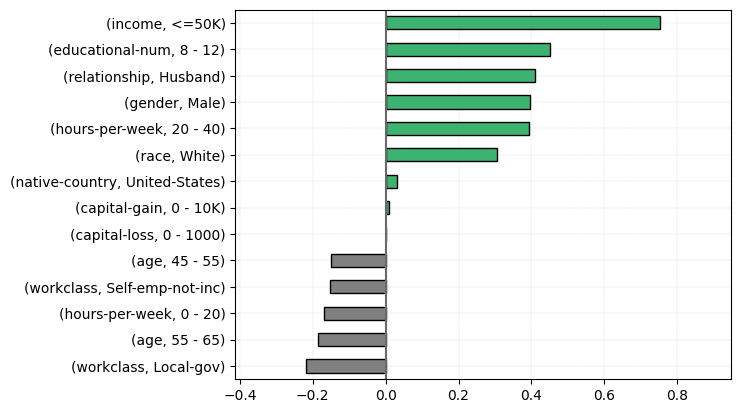

In [8]:
sharq.get_elements_table_bar_visualization(top_bottom_elements_num=5, frequency_threshold=2)

5. Get extended SHARQ results of the top and bottom 5 elements with a frequency threshold of 2% and the elements statistics within the rules set

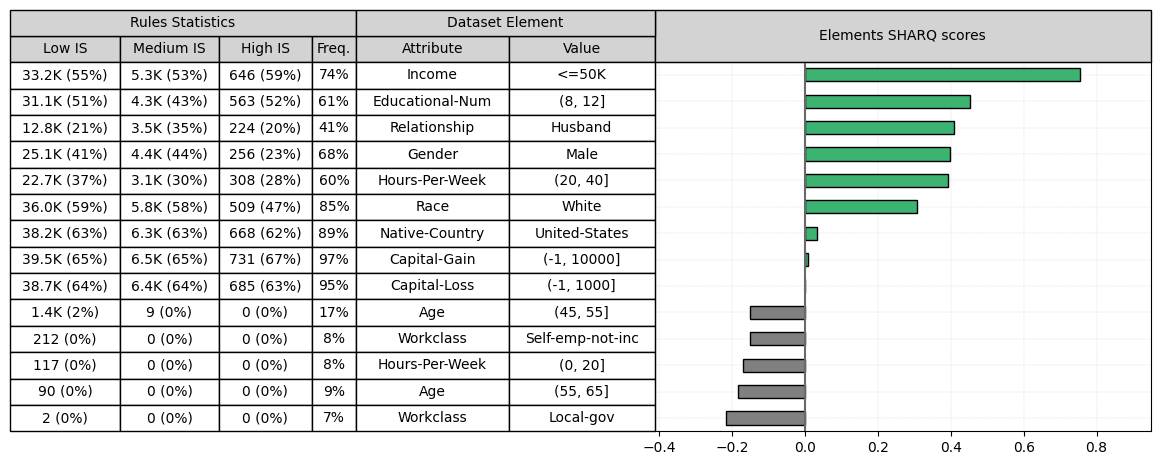

<Figure size 640x480 with 0 Axes>

In [9]:
sharq.get_elements_table_bar_visualization(top_bottom_elements_num=5, frequency_threshold=2, expanded=True)

6. Calculate and visualize the A-SHARQ score for each attribute (the mean normalized SHARQ
score for the elements of attribute 𝑎 that appear in at least one rule)

<Figure size 640x480 with 0 Axes>

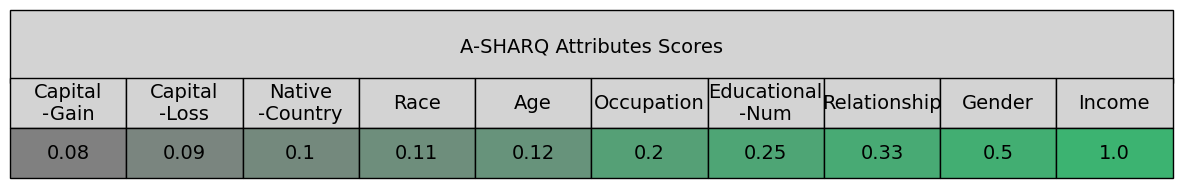

In [10]:
sharq.get_a_sharq_attributes_score_visualization()

7. Visualize the elements normalized SHARQ score. Green is for high normalized SHARQ score and grey for a low one

<Figure size 640x480 with 0 Axes>

<Figure size 1400x900 with 0 Axes>

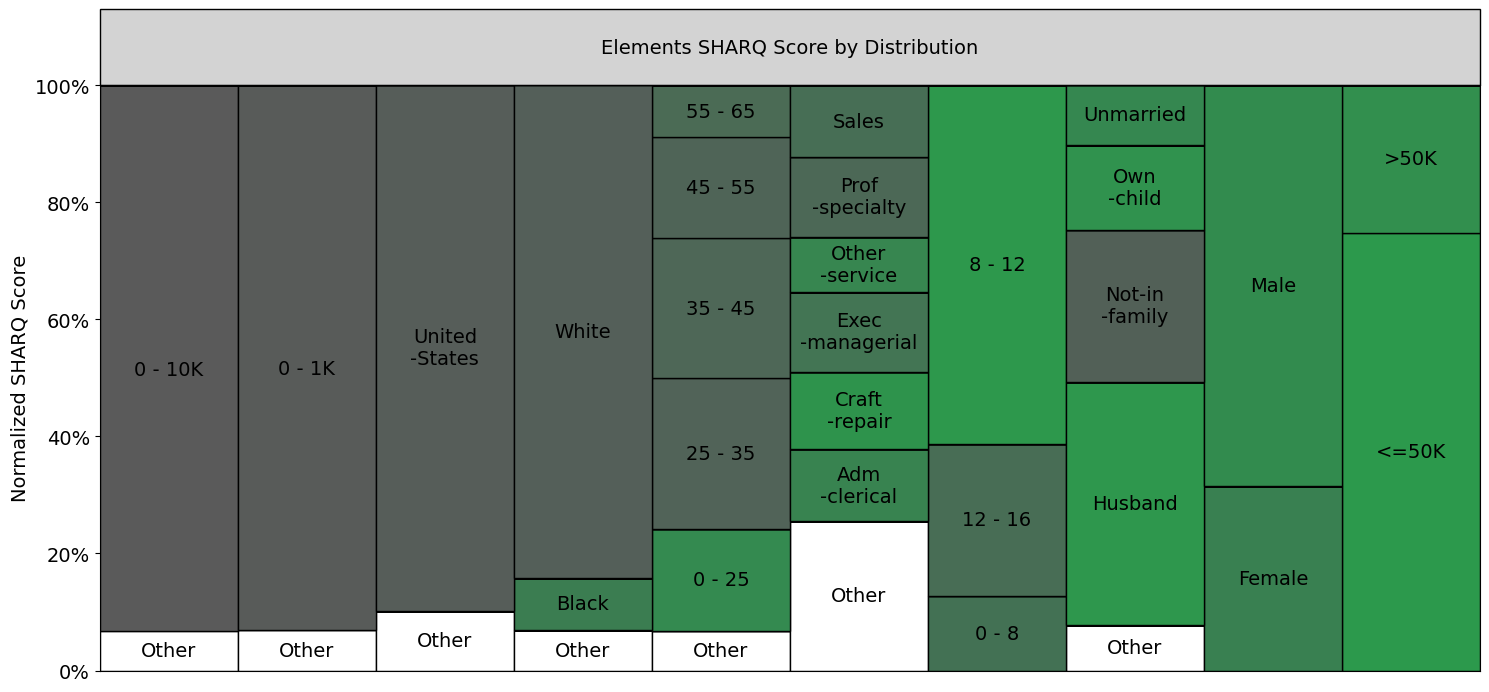

In [11]:
sharq.get_elements_sharq_distribution_visualization()

8. Add the SHARQ score to each rule in the rule set. The SHARQ score of a rule is determined by the minimum normalized SHARQ score among the normalized SHARQ scores of the elements that constitute the rule

In [12]:
sharq.add_sharq_score_to_rules_set()
sharq.rules_set.head()

,SHARQ score,score,lift,support,confidence,lhs,rhs,elements,num_of_elements
0,0.062209,0.374134,1.121001,0.124867,0.687135,"['age_(0, 25]']","['educational-num_(8, 12]']","[age_(0, 25], educational-num_(8, 12]]",2
1,0.062209,0.484695,1.315100,0.178640,0.983041,"['age_(0, 25]']",['income_<=50K'],"[age_(0, 25], income_<=50K]",2
2,0.062209,0.590407,3.628478,0.096068,0.659373,['relationship_Own-child'],"['age_(0, 25]']","[age_(0, 25], relationship_Own-child]",2
3,0.062209,0.590407,3.628478,0.096068,0.528655,"['age_(0, 25]']",['relationship_Own-child'],"[age_(0, 25], relationship_Own-child]",2
4,0.062209,0.436191,1.195975,0.159086,0.875439,"['age_(0, 25]']",['workclass_Private'],"[age_(0, 25], workclass_Private]",2


9. Sort the rules set by lift score (descending) and sharq score (ascending)

In [13]:
sharq.rules_set = sharq.rules_set.sort_values(by=['lift', 'SHARQ score'], ascending=[False, True])
sharq.rules_set.head()

,SHARQ score,score,lift,support,confidence,lhs,rhs,elements,num_of_elements
23349,0.031862,0.531372,4.119339,0.068544,0.673278,"['race_White', 'relationship_Own-child', 'work...","['age_(0, 25]', 'income_<=50K', 'native-countr...","[age_(0, 25], income_<=50K, native-country_Uni...",6
45128,0.008458,0.530825,4.117250,0.068438,0.672936,"['capital-gain_(-1, 10000]', 'race_White', 're...","['age_(0, 25]', 'income_<=50K', 'native-countr...","[age_(0, 25], capital-gain_(-1, 10000], income...",7
45694,0.001038,0.523699,4.116091,0.066631,0.672747,"['capital-loss_(-1, 1000]', 'race_White', 'rel...","['age_(0, 25]', 'income_<=50K', 'native-countr...","[age_(0, 25], capital-loss_(-1, 1000], income_...",7
45146,0.008458,0.530721,4.115628,0.068438,0.672234,"['race_White', 'relationship_Own-child', 'work...","['age_(0, 25]', 'capital-gain_(-1, 10000]', 'i...","[age_(0, 25], capital-gain_(-1, 10000], income...",7
63691,0.001038,0.523144,4.113940,0.066525,0.672395,"['capital-gain_(-1, 10000]', 'capital-loss_(-1...","['age_(0, 25]', 'income_<=50K', 'native-countr...","[age_(0, 25], capital-gain_(-1, 10000], capita...",8


In [14]:
normalized_results = sharq.get_normalized_sharq()

In [15]:
normalized_results

{'income_<=50K': 5.0,
 'educational-num_(8, 12]': 4.0,
 'relationship_Husband': 3.3333333333333335,
 'occupation_Craft-repair': 2.090909090909091,
 'relationship_Own-child': 2.0,
 'hours-per-week_(20, 40]': 1.8,
 'income_>50K': 1.7777777777777777,
 'gender_Male': 1.75,
 'occupation_Adm-clerical': 1.5294117647058822,
 'age_(0, 25]': 1.5,
 'relationship_Unmarried': 1.4210526315789473,
 'occupation_Other-service': 1.4,
 'gender_Female': 1.375,
 'occupation_Machine-op-inspct': 1.36,
 'race_Black': 1.1111111111111112,
 'hours-per-week_(0, 20]': 1.0,
 'workclass_Private': 1.0,
 'workclass_Self-emp-not-inc': 1.0,
 'workclass_Local-gov': 0.9705882352941176,
 'hours-per-week_(40, 60]': 0.9230769230769231,
 'educational-num_(0, 8]': 0.9230769230769231,
 'occupation_Exec-managerial': 0.9130434782608695,
 'age_(55, 65]': 0.8787878787878788,
 'occupation_Sales': 0.8620689655172413,
 'educational-num_(12, 16]': 0.8333333333333334,
 'occupation_Prof-specialty': 0.7857142857142857,
 'age_(35, 45]': 0.

In [16]:
results

{'workclass_Local-gov': -0.21794307672063556,
 'age_(55, 65]': -0.18437930740816746,
 'hours-per-week_(0, 20]': -0.16960412671493572,
 'workclass_Self-emp-not-inc': -0.1515815483599727,
 'age_(45, 55]': -0.14994714267587128,
 'occupation_Sales': -0.14139947059093247,
 'occupation_Prof-specialty': -0.12578318223408838,
 'race_Black': -0.11942154179890568,
 'educational-num_(0, 8]': -0.09951339278830926,
 'occupation_Machine-op-inspct': -0.09231922889763532,
 'age_(35, 45]': -0.09140025807217697,
 'occupation_Exec-managerial': -0.08528342816728511,
 'relationship_Not-in-family': -0.08502533242945369,
 'age_(25, 35]': -0.05498835077353099,
 'occupation_Other-service': -0.03159916218272981,
 'relationship_Unmarried': -0.016342927250035787,
 'educational-num_(12, 16]': -0.007820174246881714,
 'occupation_Adm-clerical': -0.006978569838153083,
 'capital-loss_(-1, 1000]': 0.0010379235167193549,
 'capital-gain_(-1, 10000]': 0.008458424097266545,
 'native-country_United-States': 0.03186192280765

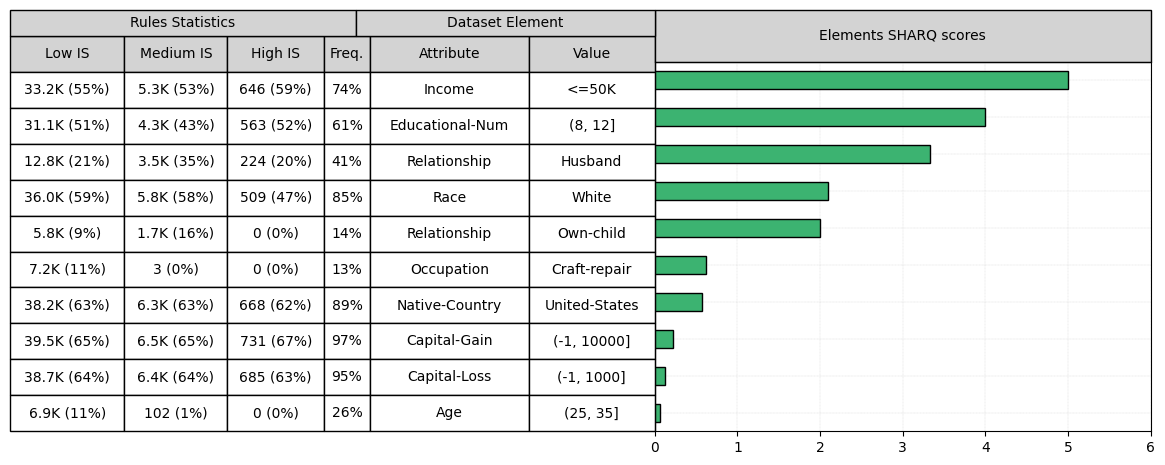

<Figure size 640x480 with 0 Axes>

In [17]:
# get the SHARQ results visualization of the normalized SHARQ scores of the top and bottom 5 elements
sharq.get_elements_table_bar_visualization(top_bottom_elements_num=5, frequency_threshold=2, expanded=True, normalized=True)